In [3]:
import numpy as np
from sampler import *
import matplotlib.pyplot as plt
import scipy.special as sp
import scipy.stats as stats
from math import prod

np.random.seed(1)

# Exercise 1

In [4]:
def uniform(x):
    if x < 0:
        return 0
    if x > 1:
        return 0
    else:
        return 1

def normal(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

x0 = 10
sigma = 1

def erf(x):
    if x > 0:
        return (np.exp(-(x-x0)**2/(2*sigma**2) - np.exp(-(x+x0)**2/(2*sigma**2))))/(sigma*np.sqrt(np.pi*2))/sp.erf(x0/sigma/np.sqrt(2))
    else:
        return 0    

## a)

In [5]:
uniform_sampler = Sampler(uniform, domain=(True, 0, 1))
normal_sampler = Sampler(normal, domain=(True, -5, 5))
erf_sampler = Sampler(erf, domain=(True, 5, 15))

N = 10

samples_uniform = uniform_sampler.sample(N)
samples_normal = normal_sampler.sample(N)
samples_erf = erf_sampler.sample(N)

## b)

In [6]:
uniform_rel_diff = []
normal_rel_diff = []
erf_rel_diff = []

for N, n_bins in [(10, 4), (100, 10), (1000, 20), (10000, 20)]:
    uniform_samples = uniform_sampler.sample(N)
    normal_samples = normal_sampler.sample(N)
    erf_samples = erf_sampler.sample(N)

    uniform_samples.set_bins(0, 1, n_bins)
    normal_samples.set_bins(-3, 3, n_bins)
    erf_samples.set_bins(x0-3*sigma, x0+3*sigma, n_bins)

    uniform_rel_diff.append((uniform_samples.rel_diff_hist, N, uniform_samples.bins, 'Uniform distribution'))
    normal_rel_diff.append((normal_samples.rel_diff_hist, N, normal_samples.bins, 'Normal distribution'))
    erf_rel_diff.append((erf_samples.rel_diff_hist, N, erf_samples.bins, 'Erf distribution'))

## c)

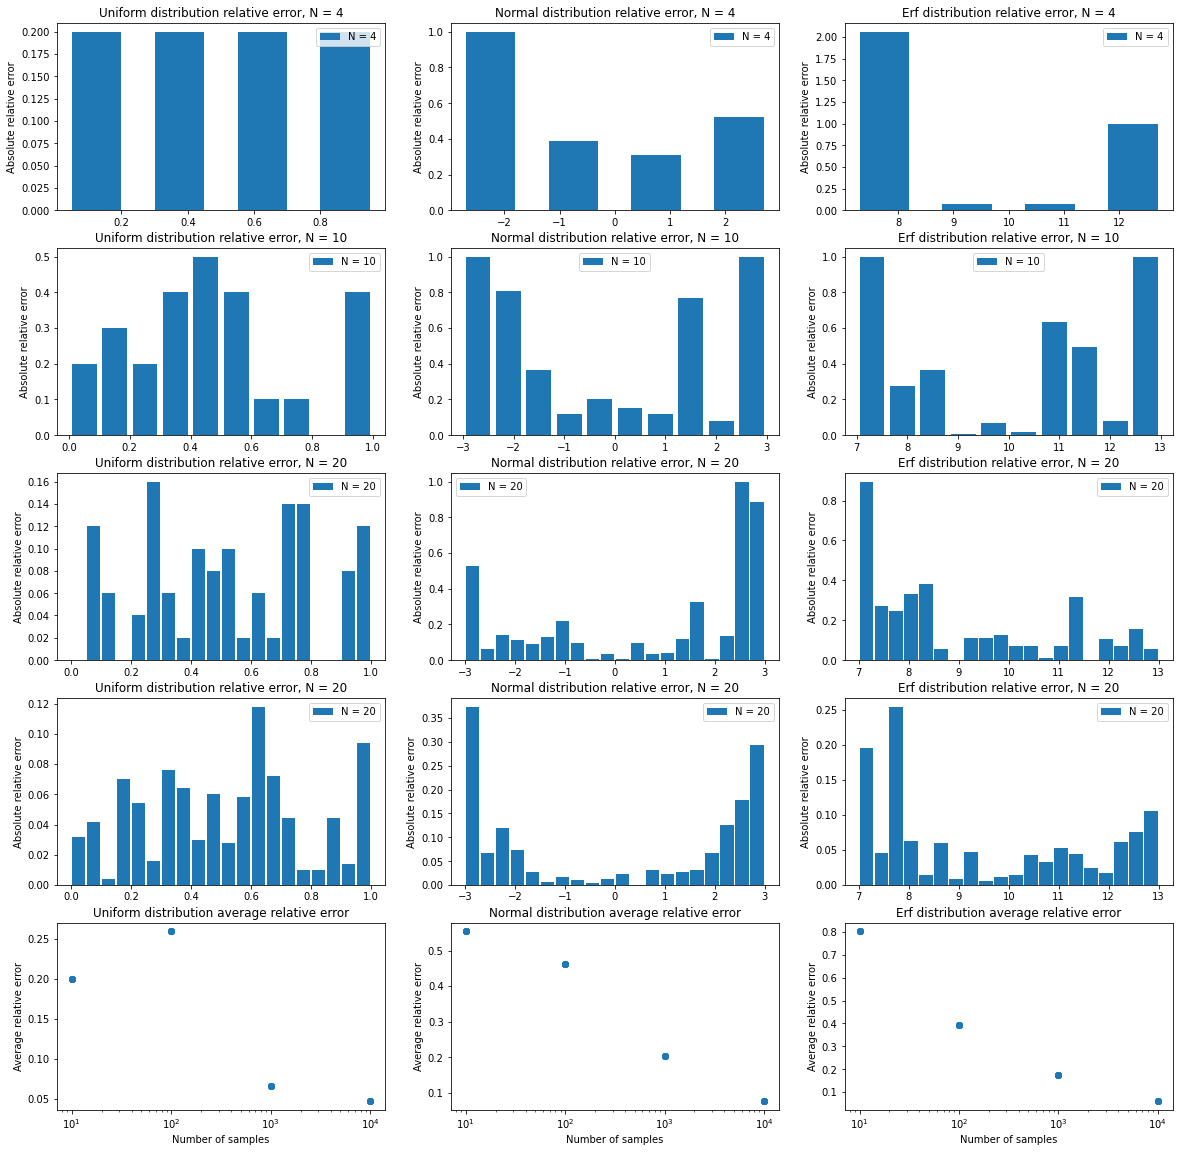

In [7]:
fig, ax = plt.subplots(5, 3, figsize=(20,20), facecolor="white")

def plot_bar(rel_diff, plot):
    n_bins = len(rel_diff[2])
    bins = [(rel_diff[2][j]+rel_diff[2][j+1])/2 for j in range(n_bins-1)]
    total_range = max(bins)-min(bins)
    bar_width = total_range/n_bins
    plot.bar(bins, rel_diff[0], width=bar_width, label=f'N = {len(rel_diff[0])}')
    plot.set_title(f'{rel_diff[3]} relative error, N = {len(rel_diff[0])}')
    plot.set_ylabel('Absolute relative error')
    plot.legend()

for i in range(4):
    for rel_diff, j in zip([uniform_rel_diff, normal_rel_diff, erf_rel_diff], range(3)):
        plot_bar(rel_diff[i], ax[i][j])
        average_rel_diff = [sum(rel_diff[k][0])/len(rel_diff[k][0]) for k in range(4)]
        ax[4][j].plot([10, 100, 1000, 10000], average_rel_diff, 'o', color='tab:blue')
        ax[4][j].set_xscale('log')
        ax[4][j].set_ylabel('Average relative error')
        ax[4][j].set_xlabel('Number of samples')
        ax[4][j].set_title(f'{rel_diff[i][3]} average relative error')